In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
lbn=LabelEncoder()
df.sex=lbn.fit_transform(df.sex)
df.smoker=lbn.fit_transform(df.smoker)
df.region=lbn.fit_transform(df.region)

In [13]:
df_factors = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region',
'charges']]


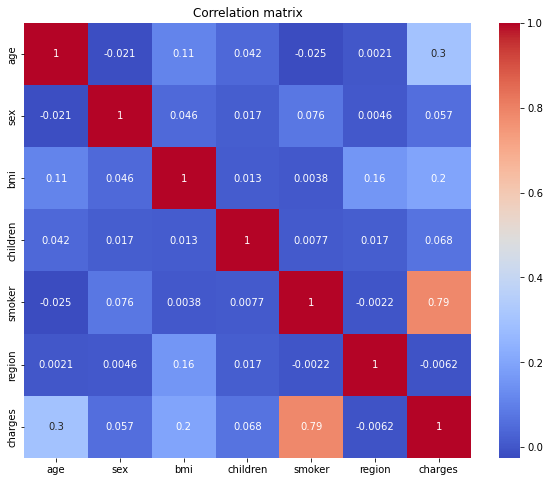

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_factors.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()


In [15]:
X = df.drop(['charges'], axis=1)
y = df.charges
print("X shape: ", X.shape)
print("y shape: ", y.shape)


X shape:  (1338, 6)
y shape:  (1338,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)


X train shape:  (1070, 6)
y train shape:  (1070,)
X test shape:  (268, 6)
y test shape:  (268,)


In [17]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
y_pred_decision_tree_model = decision_tree_model.predict(X_test)

In [20]:
print("Training accuracy: ", decision_tree_model.score(X_train, y_train)*100)
print("Testing accuracy: ", decision_tree_model.score(X_test, y_test)*100)

Training accuracy:  100.0
Testing accuracy:  62.38859023293371


In [21]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
y_pred_random_forest_model = random_forest_model.predict(X_test)
print("Training accuracy: ", random_forest_model.score(X_train, y_train)*100)
print("Testing accuracy: ", random_forest_model.score(X_test, y_test)*100)


Training accuracy:  97.85419101123269
Testing accuracy:  82.15389909317494
